# Bandit Problem

In [217]:
# imports
from bandits import Bandit
import random
import matplotlib.pyplot as plt
import numpy as np
# Include your imports here, if any are used.

A list of ten bandit objects initialized in the list...

In [218]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [219]:
bandits[0].pullLever()

-1.9346071069309672

## Greedy algorithm Implementation

In [220]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    q = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    reward = []
    for i in range(1, 1001):
      e = q.index(max(q))
      r = bandits[e].pullLever()
      reward.append(r)
      q[e] = q[e] + (r-q[e])/i
    return reward

reward_list = run_greedy()

Plot the cumulative average of rewards as the number of iterations increases.

In [221]:
reward_cumulative = [sum(reward_list[:i+1])/(i+1) for i in range(len(reward_list))]

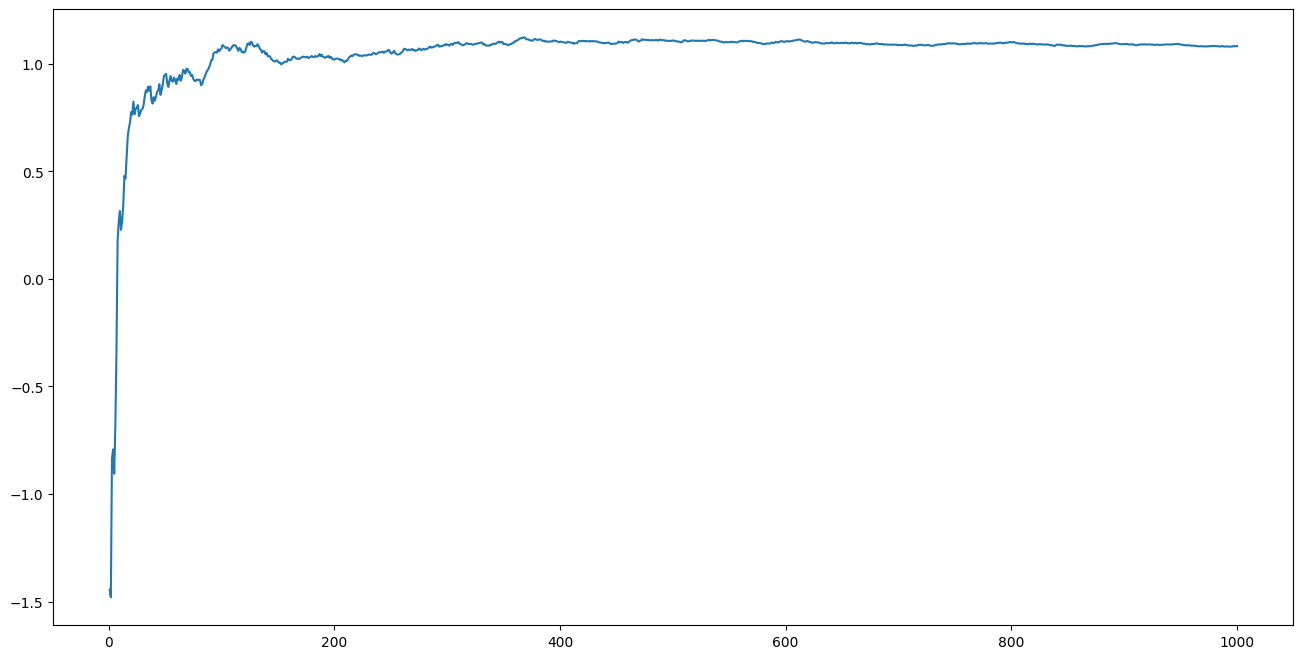

In [222]:
plt.figure(figsize = (16, 8))
plt.plot(range(1, 1001), reward_cumulative)
plt.show()

## $\epsilon$-greedy Algorithm

In [223]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    q = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    reward = []
    for i in range(1, 1001):
      if random.random() < epsilon:
        e = random.randint(0, len(bandits)-1)
      else:
        e = q.index(max(q))
      r = bandits[e].pullLever()
      reward.append(r)
      q[e] = q[e] + (r-q[e])/i
    return reward


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [224]:
reward_list_epsilon_1 = run_epsilon_greedy(0.1)
reward_cumulative_epsilon_1 = [sum(reward_list_epsilon_1[:i+1])/(i+1) for i in range(len(reward_list_epsilon_1))]
reward_list_epsilon_01 = run_epsilon_greedy(0.01)
reward_cumulative_epsilon_01 = [sum(reward_list_epsilon_01[:i+1])/(i+1) for i in range(len(reward_list_epsilon_01))]

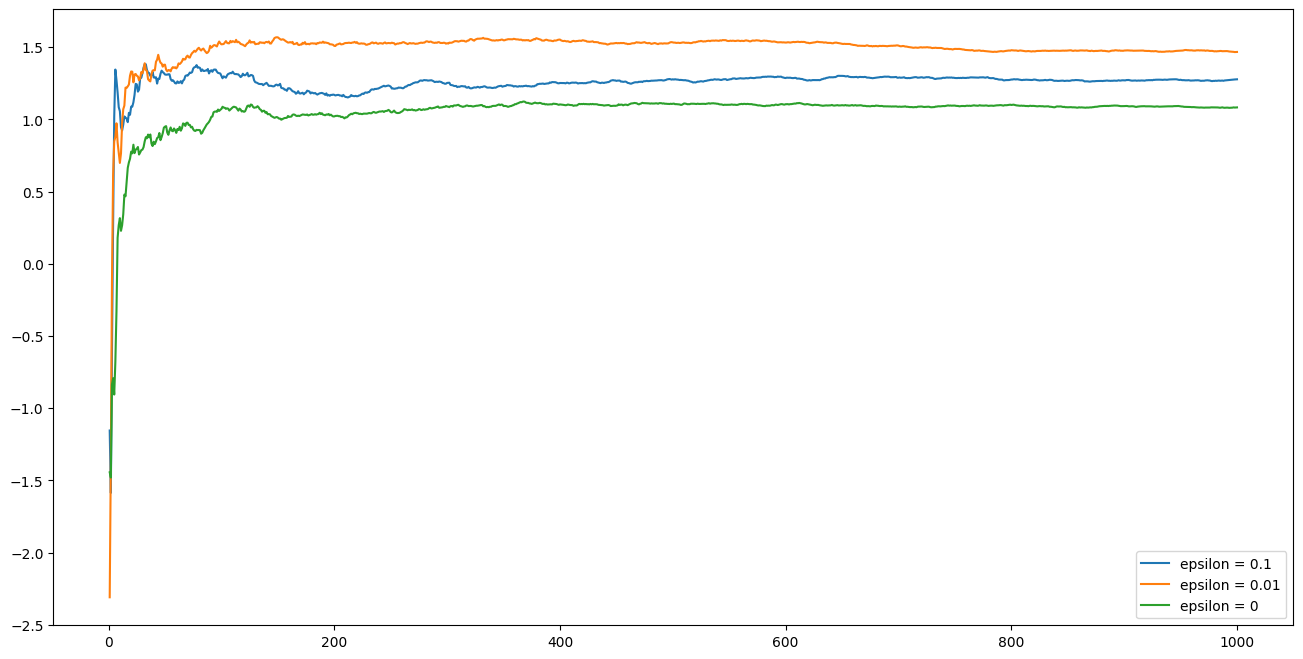

In [225]:
plt.figure(figsize = (16, 8))
plt.plot(range(1, 1001), reward_cumulative_epsilon_1, label = 'epsilon = 0.1')
plt.plot(range(1, 1001), reward_cumulative_epsilon_01, label = 'epsilon = 0.01')
plt.plot(range(1, 1001), reward_cumulative, label = 'epsilon = 0')
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [226]:
final_rewards = []
for i in range(1, 1001):
  reward_list_epsilon = run_epsilon_greedy(i/1000)
  reward_cumulative_epsilon = sum(reward_list_epsilon)/1000
  final_rewards.append(reward_cumulative_epsilon)
optimal_epsilon = (final_rewards.index(max(final_rewards)) + 1)/1000
print(f'{max(final_rewards)} for epsilon = {optimal_epsilon}')

1.8870515709502647 for epsilon = 0.07


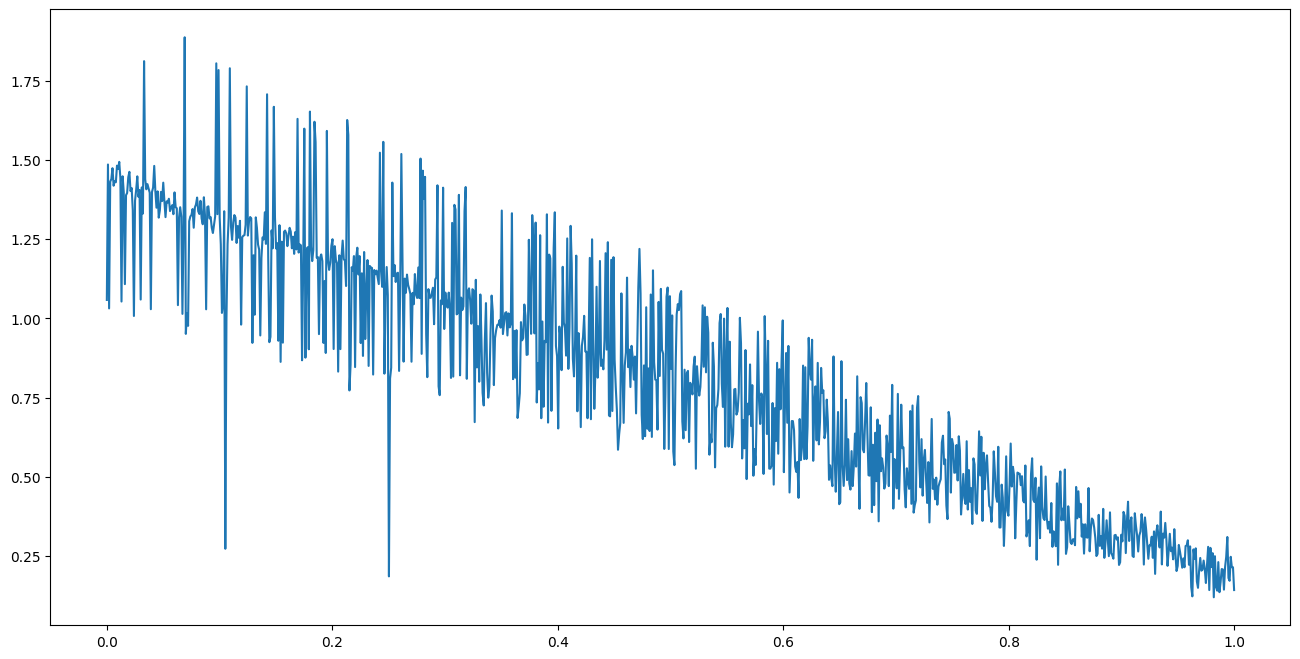

In [227]:
plt.figure(figsize = (16, 8))
plt.plot(np.linspace(0, 1, 1000), final_rewards)
plt.show()

## Optimistic Initial Values

In [228]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    # Return the reward from the bandits in a list
    q = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
    reward = []
    for i in range(1, 1001):
      e = random.randint(0, len(bandits)-1)
      e = q.index(max(q))
      r = bandits[e].pullLever()
      reward.append(r)
      q[e] = q[e] + (r-q[e])/i
    return reward

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [229]:
optimal_reward_list = run_optimistic_greedy()
optimal_reward_cumulative = [sum(optimal_reward_list[:i+1])/(i+1) for i in range(len(optimal_reward_list))]

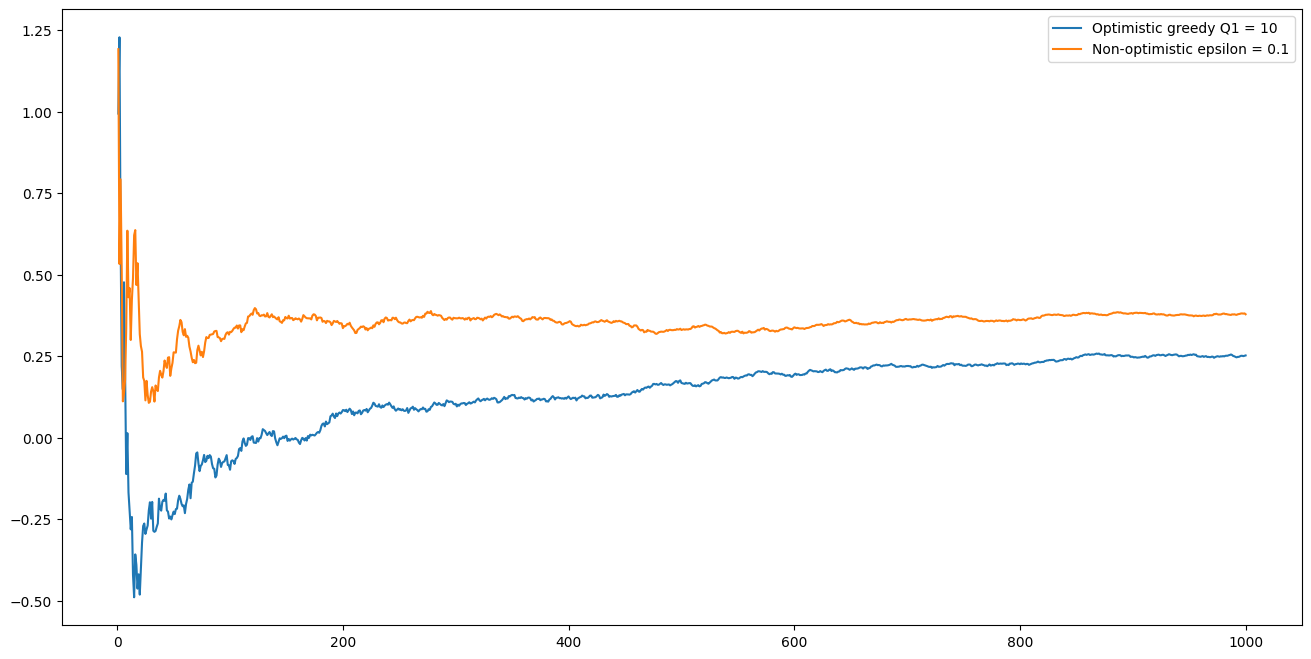

In [213]:
plt.figure(figsize = (16, 8))
plt.plot(range(1, 1001), optimal_reward_cumulative, label = 'Optimistic greedy Q1 = 10')
plt.plot(range(1, 1001), reward_cumulative_epsilon_1, label = 'Non-optimistic epsilon = 0.1')
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [214]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    q = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    reward = []
    n = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for t in range(1, 1001) :
      qn = []
      for i in range(10) :
        if n[i] != 0 :
          qn.append(q[i] + c*np.sqrt(np.log(t)/n[i]))
        else :
          qn.append(np.inf)
      e = qn.index(max(qn))
      r = bandits[e].pullLever()
      reward.append(r)
      q[e] = q[e] + (r-q[e])/t
      n[e] += 1
    return reward


In [215]:
ucb_reward_list = run_ucb(2)
ucb_reward_cumulative = [sum(ucb_reward_list[:i+1])/(i+1) for i in range(len(ucb_reward_list))]

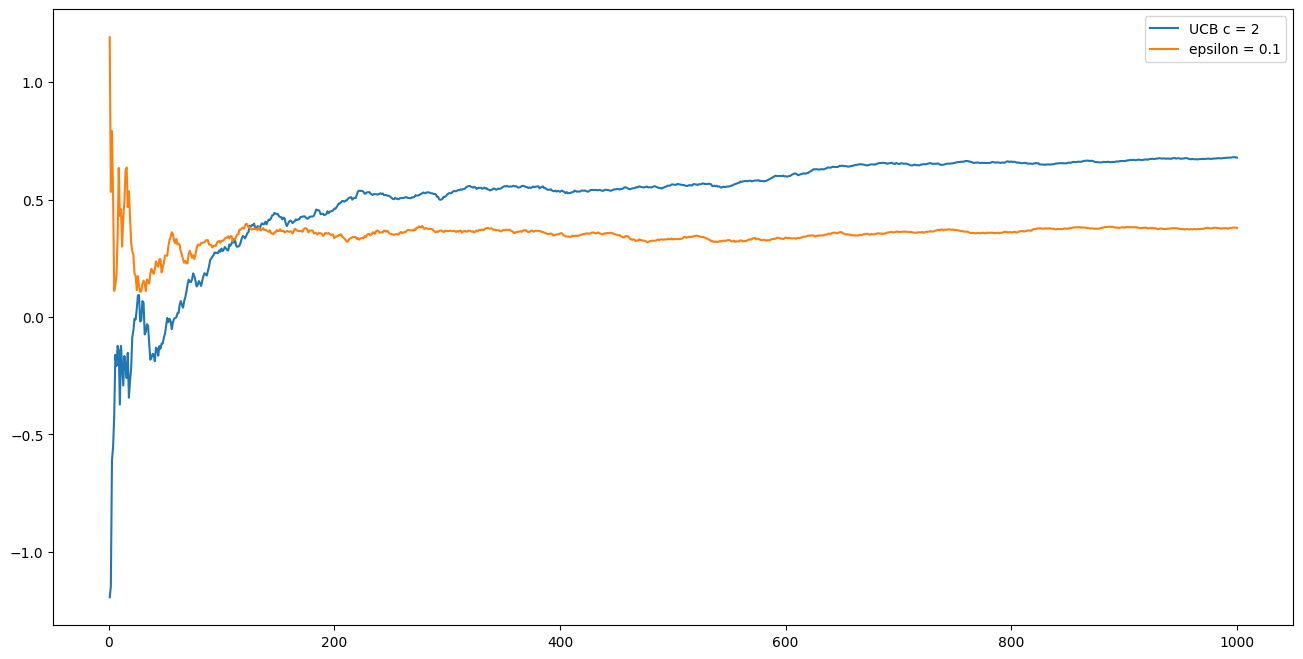

In [216]:
plt.figure(figsize = (16, 8))
plt.plot(range(1, 1001), ucb_reward_cumulative, label = 'UCB c = 2')
plt.plot(range(1, 1001), reward_cumulative_epsilon_1, label = 'epsilon = 0.1')
plt.legend()
plt.show()